In [2]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

Using TensorFlow backend.


In [3]:
train_images.shape,train_labels.shape,test_images.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
from keras import layers,models

In [5]:
network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

RuntimeError: tf.placeholder() is not compatible with eager execution.

In [5]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [6]:
##Transforming the data in the form the network expects it to.
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [7]:
##transform the labels into categorical, since labels are in text form, but the network only deals
##with the numbers.
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
network.fit(train_images,train_labels,epochs=10,batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 15s 253us/step - loss: 0.2519 - acc: 0.9274
Epoch 2/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.1018 - acc: 0.9696
Epoch 3/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0668 - acc: 0.9799
Epoch 4/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0483 - acc: 0.9852
Epoch 5/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0372 - acc: 0.9888
Epoch 6/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0279 - acc: 0.9917
Epoch 7/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0215 - acc: 0.9940
Epoch 8/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.0166 - acc: 0.9949
Epoch 9/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.0125 - acc: 0.9965
Epoch 10/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0098 - acc

In [9]:
test_loss,test_accuracy = network.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 74us/step


In [10]:
test_loss,test_accuracy

(0.0714866100803647, 0.9815)

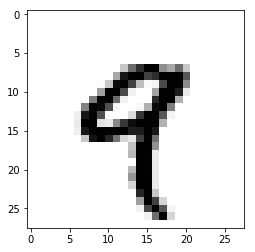

In [13]:
from keras.datasets import mnist
(trn_images,trn_labels),(tst_images,tst_labels) = mnist.load_data()
digit = trn_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

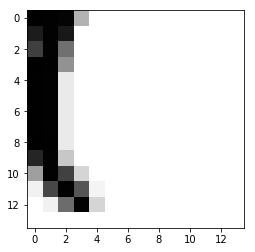

In [15]:
##Manipulating the slices of tensors to select required part of an image
my_slice = trn_images[:,14:,14:]
m =  my_slice[4]
plt.imshow(m,cmap=plt.cm.binary)
plt.show()

In [ ]:
##selecting the nth batch
for n in range(batch_size):
    batch = train_images[128 * n:128 * (n + 1)]
    

In [12]:
from keras.activations import relu
import numpy as np
x = np.random.rand(10)
W = np.random.rand(10)
b = np.random.rand(10)
out = relu(np.dot(x,W)+b,alpha=0.0)

In [13]:
import tensorflow as tf
sess = tf.Session()
sess.run(out)

array([2.75639038, 3.31974055, 2.66731721, 2.69637966, 3.46452235,
       2.65637042, 3.02666655, 3.47043283, 3.21883572, 3.01202257])

In [24]:
import numpy.distutils.system_info as sysinfo
sysinfo.get_info('blas')

{'define_macros': [('HAVE_CBLAS', None)],
 'include_dirs': ['/usr/local/include',
  '/usr/include',
  '/home/surya/DL/include'],
 'language': 'c',
 'libraries': ['blas', 'blas'],
 'library_dirs': ['/usr/lib']}

In [4]:
from keras.activations import relu
import numpy as np
X = np.array([[-0.1,1]])
out = relu(X,alpha=0.0)

/home/surya/DL/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
import tensorflow as tf
sess = tf.Session()
sess.run(out)

array([[0., 1.]])

In [2]:
import numpy as np
def naive_dot_product(x,y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0
    for i in range(x.shape[0]):
        z = z + x[i] * y[i]
    return z
naive_dot_product(np.array([1,2,3]),np.array([1,2,3]))

14

In [3]:
##naive matrix vector product
def naive_matrix_vector_product(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] = z[i] + x[i][j] * y[j]
    return z

naive_matrix_vector_product(np.array([[1,2],[3,4]]),np.array([1,2]))

array([ 5., 11.])